In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [26]:
#reading dataset
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATASET.xlsx')
df

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#cleaning the dataset
start=910
drop_list=[]
for i in range(0,9):
  drop_list.append(start)
  start+=1
df.drop(drop_list,inplace=True)                                         #drop section having only 9 years
df.fillna(0,inplace=True)                                               #replacing empty cells with zero
df.columns = df.columns.str.replace('Unnamed: 0', 'Section_name')       #Changing the column name
for j in range(0,1000,10):                                              #Labelling all sections
  df.iloc[j+1:j+10,0]=df.iloc[j,0]
df

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [28]:
#create test data
df_test=df.loc[df['year']==10]
df_test

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [64]:
extratreereg=ExtraTreesRegressor(bootstrap=False,criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=100,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.05,
                    n_jobs=None, oob_score=False, random_state=1, verbose=0,
                    warm_start=False)

In [89]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']


In [90]:
import warnings
warnings.filterwarnings("ignore")
rmse = []
n ,index= 0,0
for j in range(10,15):
  ans,count = 0,0
  for i in range(0, 1000, 10):
    xtrain = df.iloc[i:i+9, 1:10]
    ytrain = df.iloc[i:i+9, j]
    xtest = df.iloc[i+9, 1:10].to_numpy()
    ytest = df.iloc[i+9, j]
    extratreereg.fit(xtrain, ytrain)
    ypred = extratreereg.predict(xtest.reshape(1,-1))[0]
    predicted[names[index]].append(ypred)
    ans += (ytest - ypred)**2
    count += 1
    n += 1
  rmse.append(ans)
  index += 1

In [91]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.200,56.855,49.59,7.98,1.907400
1,58.534,28.591,0.96,7.86,0.792600
2,70.542,0.000,0.00,13.20,1.378690
3,20.594,55.028,58.61,7.52,1.871520
4,0.000,259.336,34.00,5.99,1.760880
...,...,...,...,...,...
95,177.662,186.289,9.49,7.69,1.546750
96,5.116,69.300,23.22,11.90,1.074463
97,114.531,64.392,14.36,11.69,0.968200
98,132.751,278.360,154.87,10.78,2.109010


In [92]:
tot=0
for i in rmse:
  print((i/count)**0.5)         #individual error w.r.t every column
  tot+=i
print((tot/n)**0.5)             #total rmse 

63.5655281816725
63.863937666651914
25.619853766171264
14.57225984533627
0.25394288598929105
42.39804490373193


In [93]:
#Selecting random 30 rows
import random
idx = []
for i in range(30):
  idx.append(random.randint(0,99))
idx

[67,
 15,
 65,
 11,
 87,
 63,
 92,
 2,
 30,
 5,
 1,
 30,
 69,
 64,
 50,
 31,
 48,
 61,
 81,
 51,
 96,
 12,
 89,
 89,
 77,
 28,
 91,
 57,
 27,
 92]

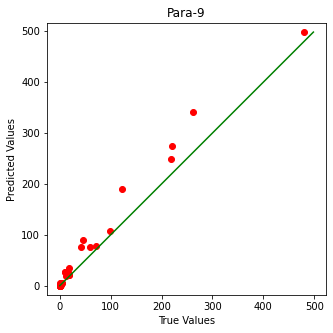

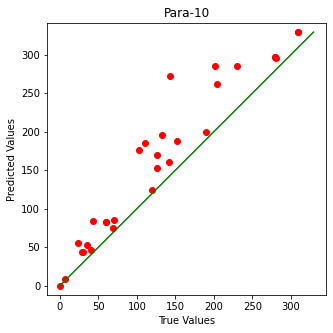

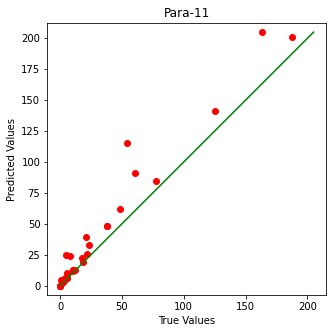

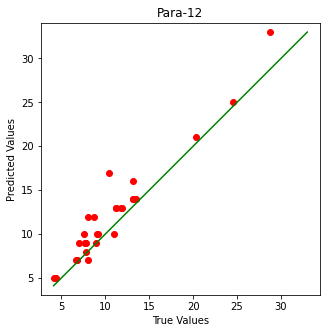

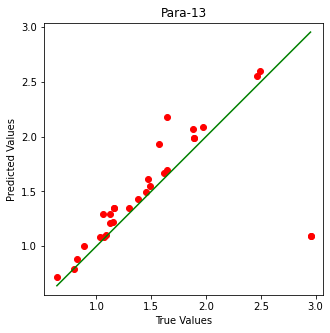

In [94]:
#Scatter plot for random 30 rows from target dataset
off=10
for i in range(5):
  plt.figure(figsize=(5,5))
  true_value = df_pred.iloc[idx, i]
  predicted_value = df_test.iloc[idx, i + off]
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.scatter(true_value, predicted_value, c='red')
  plt.plot([p1, p2], [p1, p2], 'g-')
  plt.title(names[i])
  plt.xlabel('True Values', fontsize=10)
  plt.ylabel('Predicted Values', fontsize=10)
  plt.axis('equal')

plt.show()

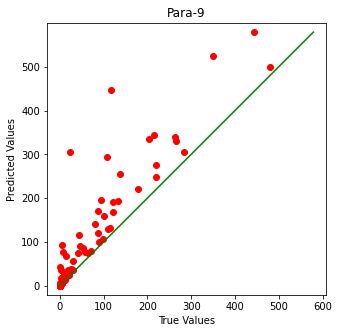

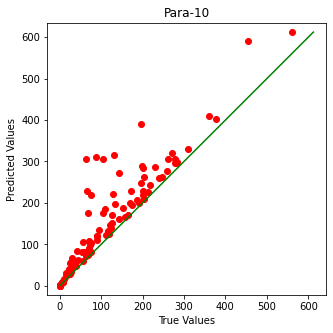

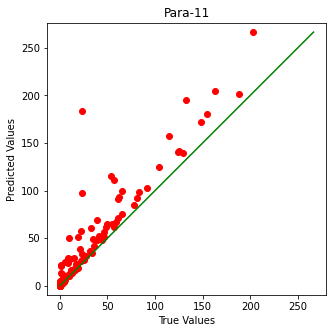

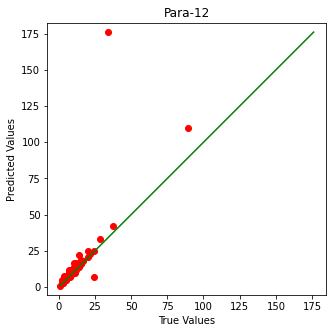

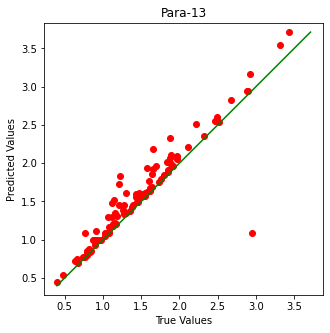

In [95]:
#Scatter plot for all "year = 10" rows in target data
off=10
for i in range(5):
  plt.figure(figsize=(5,5))
  true_value = df_pred.iloc[:, i]
  predicted_value = df_test.iloc[:, i + off]
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.scatter(true_value, predicted_value, c='red')
  plt.plot([p1, p2], [p1, p2], 'g-')
  plt.title(names[i])
  plt.xlabel('True Values', fontsize=10)
  plt.ylabel('Predicted Values', fontsize=10)
  plt.axis('equal')
  plt.show()